In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [2]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
import argparse
from sklearn.decomposition import PCA
import numpy as np

2022-07-10 12:55:00.701905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-10 12:55:00.701983: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Mnist

In [21]:
args = argparse.Namespace()
args.binary_data = [0,1]

data = MNIST(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Binarizing data...
Binarizing data...


In [22]:
data

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (12665, 28, 28, 1) │ (2115, 28, 28, 1) │ (28, 28, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (12665,)           │ (2115,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 255.00
Mean: 31.00
Std: 76.79
Train labels stats
Min: 0.00
Max: 1.00

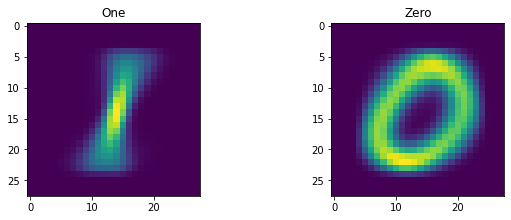

In [23]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # 0, 1
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis = 0))
    plt.title('One' if i ==0 else 'Zero')

In [24]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(12665, 784)

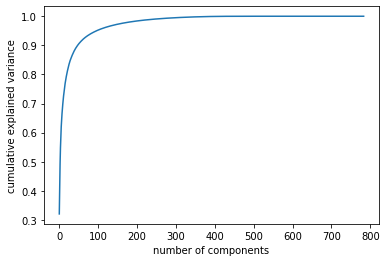

In [25]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7

data = MNIST(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Binarizing data...
Center cropping...
Binarizing data...
Center cropping...


In [33]:
data

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (12665, 20, 20, 1) │ (2115, 20, 20, 1) │ (20, 20, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (12665,)           │ (2115,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 255.00
Mean: 59.91
Std: 98.43
Train labels stats
Min: 0.00
Max: 1.00

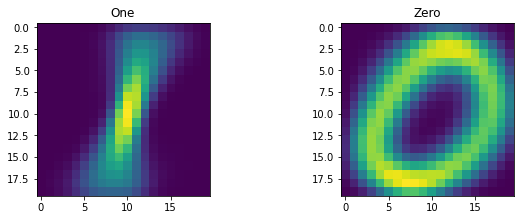

In [34]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # 0, 1
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis = 0))
    plt.title('One' if i ==0 else 'Zero')

In [35]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(12665, 400)

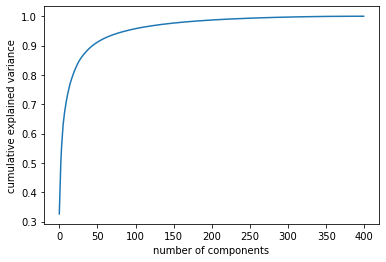

In [36]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.pca = 64

data = MNIST(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Binarizing data...
Performing PCA on data...
Cumulative sum : 92.31408857200489
Binarizing data...
Performing PCA on data...
Cumulative sum : 92.83701852494632


In [41]:
data

Dataset :MNIST
╒════════╤══════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size       │ Test size       │ Dims      │
╞════════╪══════════════════╪═════════════════╪═══════════╡
│ X      │ (12665, 8, 8, 1) │ (2115, 8, 8, 1) │ (8, 8, 1) │
├────────┼──────────────────┼─────────────────┼───────────┤
│ y      │ (12665,)         │ (2115,)         │ (1,)      │
╘════════╧══════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -1312.29
Max: 2314.41
Mean: 0.00
Std: 215.57
Train labels stats
Min: 0.00
Max: 1.00

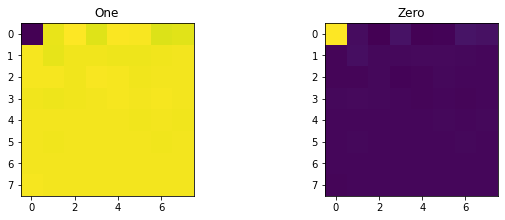

In [42]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # 0, 1
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis = 0))
    plt.title('One' if i ==0 else 'Zero')

## Electron Photon

In [49]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Center cropping...
Center cropping...


In [50]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.44
Mean: 0.02
Std: 0.09
Train labels stats
Min: 0.00
Max: 1.00

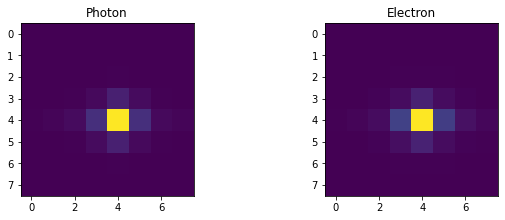

In [51]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [52]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 64)

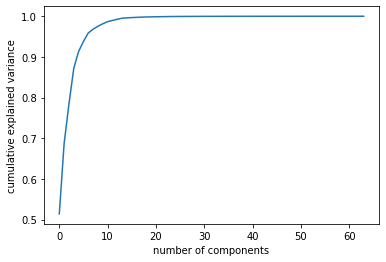

In [53]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [54]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.pca = 16

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Center cropping...
Performing PCA on data...
Cumulative sum : 99.66972
Center cropping...
Performing PCA on data...
Cumulative sum : 99.71469


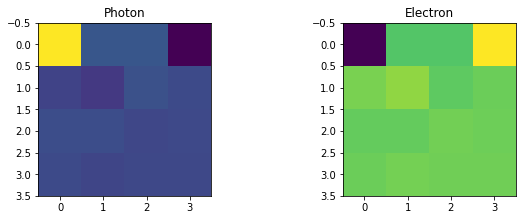

In [55]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [59]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.graph_conv = 1

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Performing graph convolution...
Performing graph convolution...


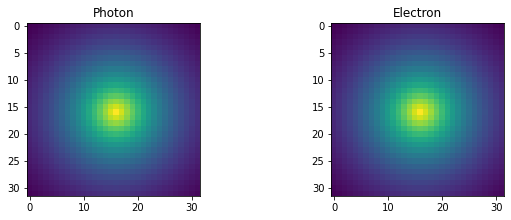

In [60]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [63]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.graph_conv = 1

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Center cropping...
Performing graph convolution...
Center cropping...
Performing graph convolution...


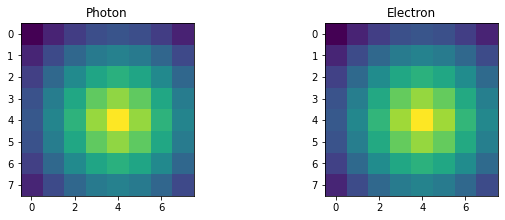

In [64]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

## Quark Gluon

In [65]:
args = argparse.Namespace()

data = QuarkGluon(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded


In [66]:
data

Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 39, 39, 1) │ (1000, 39, 39, 1) │ (39, 39, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 7.09
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00

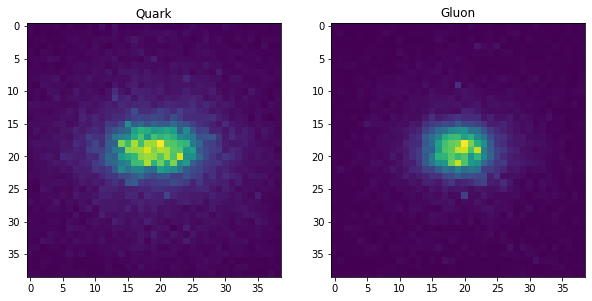

In [68]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Quark' if i ==0 else 'Gluon')

In [69]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 1521)

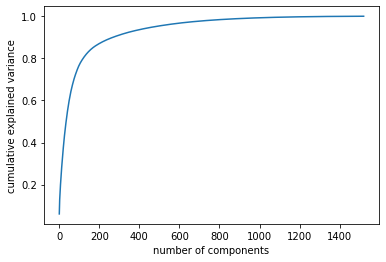

In [70]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [71]:
args = argparse.Namespace()
args.pca = 400

data = QuarkGluon(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Performing PCA on data...
Cumulative sum : 93.51652
Performing PCA on data...
Cumulative sum : 98.50751


In [72]:
data

Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 20, 20, 1) │ (1000, 20, 20, 1) │ (20, 20, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: -0.82
Max: 9.86
Mean: -0.00
Std: 0.02
Train labels stats
Min: 0.00
Max: 1.00

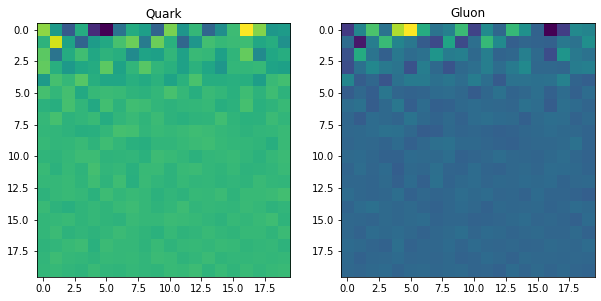

In [73]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Quark' if i ==0 else 'Gluon')